# _Unsupervised Learning:   Hierarchical Clustering and K-Means_


## Agglomerative Hierarchical Clustering

Useful readings can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html) and [here](https://en.wikipedia.org/wiki/Hierarchical_clustering).


### Short Demo

In [1]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Values extracted from the official scikit-learn documentation (check the first link).
X = np.array([[1, 2], [1, 4], [1, 0],
              [4, 2], [4, 4], [4, 0]])

In [3]:
X

array([[1, 2],
       [1, 4],
       [1, 0],
       [4, 2],
       [4, 4],
       [4, 0]])

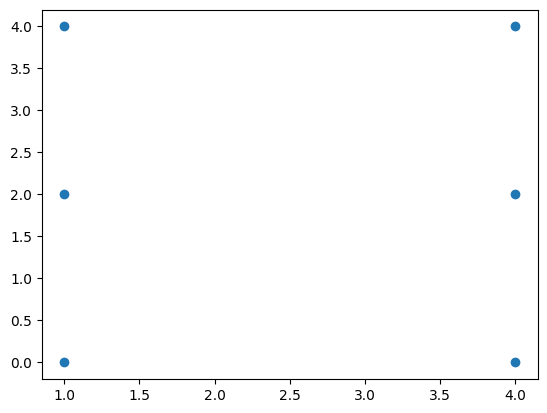

In [4]:
# Visualise data
plt.scatter(X[:,0], X[:,1])

In [5]:
# Agglomerative Hierarchical Clustering model with no parameters
aggl_model_demo = AgglomerativeClustering().fit(X)

In [6]:
aggl_model_demo

AgglomerativeClustering()

In [7]:
# Cluster labels for each point
aggl_model_demo.labels_

array([1, 1, 1, 0, 0, 0])

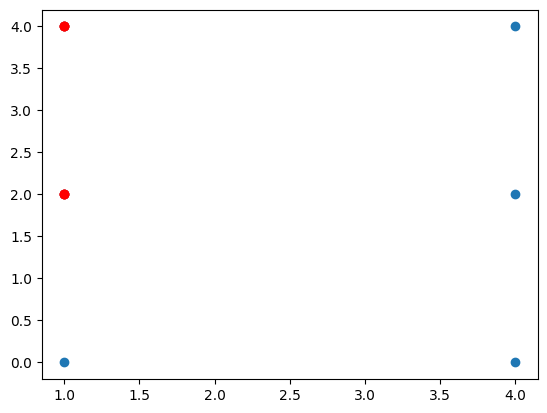

In [8]:
# Visualise data

plt.scatter(X[:,0], X[:,1])
plt.scatter(X[aggl_model_demo.labels_,0], X[aggl_model_demo.labels_,1], c='r')

### Task 0

Play around with `data.txt` and:
* Plot data before applying the _Agglomerative Hierarchical Clustering_ algorithm (**TO DO1**);
* **TO DO2**:
    - Define a new variable _X_ to store `data_txt`,
    - Apply the _Agglomerative Hierarchical Clustering_ algorithm and modify its parameters for 15 clusters;
    - Write down your observations for different values of `affinity` (_"euclidean"_ or _"manhattan"_) and `linkage` (_"ward"_ or _"complete"_);
* Visualise the obtained clusters.

_Note:_ At the end of this task, please use the `markdown` option provided in the notebook for your observations.

In [9]:
# Load data for this exercise
data_txt = np.loadtxt('data.txt', usecols=(0, 1), skiprows=1)

In [10]:
data_txt

array([[665845., 557965.],
       [597173., 575538.],
       [618600., 551446.],
       ...,
       [650661., 861267.],
       [599647., 858702.],
       [684091., 842566.]], shape=(4999, 2))

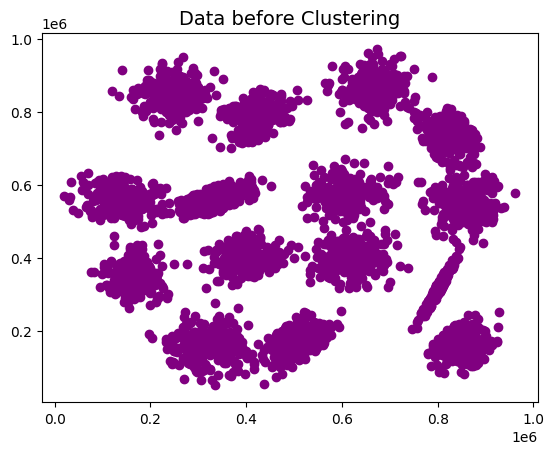

In [11]:
# TO DO1

plt.scatter(data_txt[:, 0], data_txt[:, 1], c='purple', marker='o')
plt.title('Data before Clustering', fontsize=14)
plt.show()


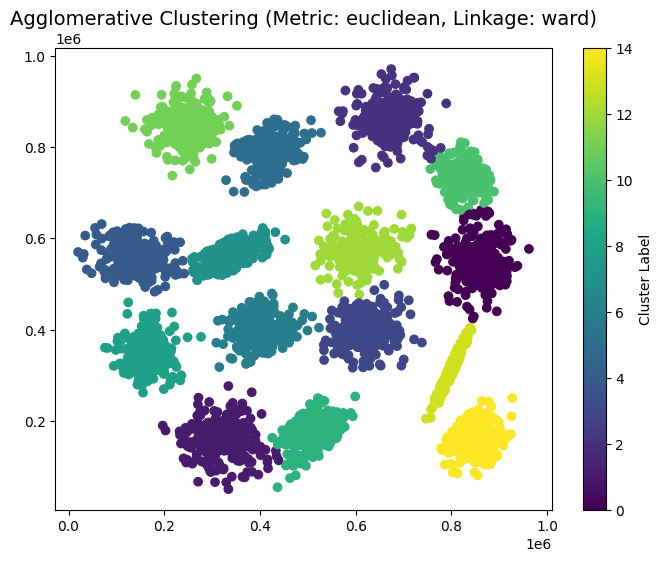

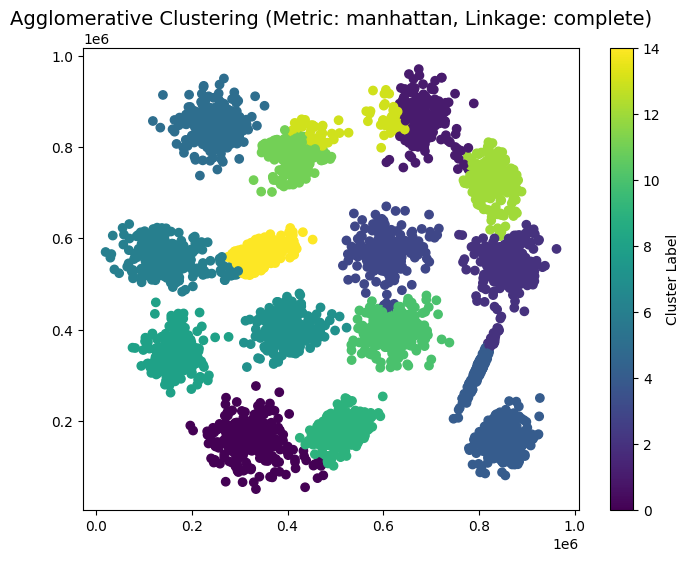

In [12]:
X = np.loadtxt('data.txt', usecols=(0, 1), skiprows=1)

model = AgglomerativeClustering(n_clusters=15, metric="euclidean", linkage="ward")

y_predict = model.fit_predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_predict)
plt.title('Agglomerative Clustering (Metric: euclidean, Linkage: ward)', fontsize=14)
plt.colorbar(label='Cluster Label')
plt.show()


X1 = np.loadtxt('data.txt', usecols=(0, 1), skiprows=1)

model1 = AgglomerativeClustering(n_clusters=15, metric="manhattan", linkage="complete")

y_predict1 = model1.fit_predict(X1)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_predict1)
plt.title('Agglomerative Clustering (Metric: manhattan, Linkage: complete)', fontsize=14)
plt.colorbar(label='Cluster Label')
plt.show()

Euclidean + Ward have better definition for the clusters (as in they don't take points from other clusters)

Euclidean + Ward also make the clusters be more grouped up together (less distance between points in the clusters)

In [13]:
# Expected plot for TO DO2

**TO DO3**: Use the _Nearest Centroid_ [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestCentroid.html) to compute the centroids of each cluster.

In [14]:
# TO DO3
from sklearn.neighbors import NearestCentroid

centroid_model = NearestCentroid()
centroid_model.fit(X, y_predict)
centroids = centroid_model.centroids_

# Print the centroids
print('Centroids:')
print(centroids)

Centroids:
[[858523.47107438 549109.0137741 ]
 [321607.60349854 161194.23323615]
 [672400.67597765 861555.2849162 ]
 [619663.6884273  398658.75074184]
 [140019.83526012 558305.60115607]
 [417799.69426752 787001.99363057]
 [399223.625      404923.23579545]
 [337858.94189602 562276.80428135]
 [167727.3880597  348147.6       ]
 [508441.62931034 176054.77873563]
 [823717.6744186  733102.37209302]
 [244654.8856305  847642.04105572]
 [606060.5959596  574146.15824916]
 [802138.44551282 319314.90384615]
 [852675.82769231 157386.94461538]]


**TO DO4:** Iterate through the obtained labels and visualise each cluster with its corresponding centroid.

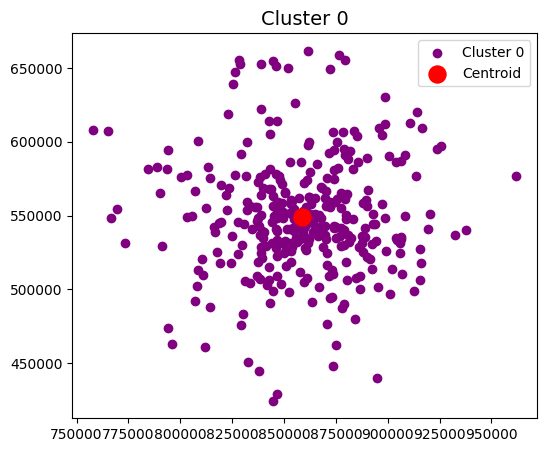

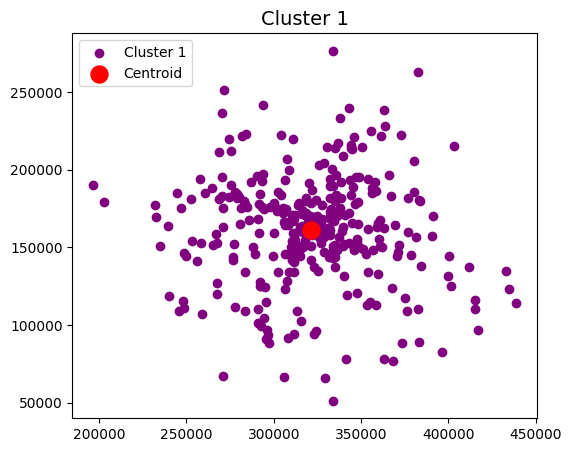

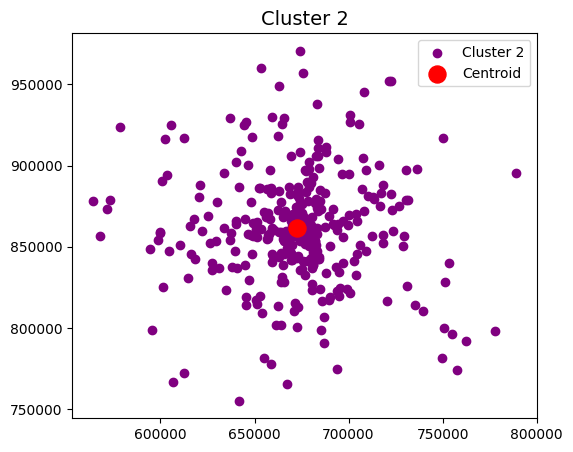

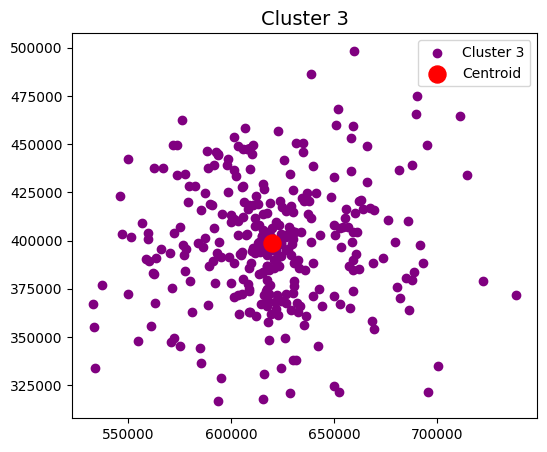

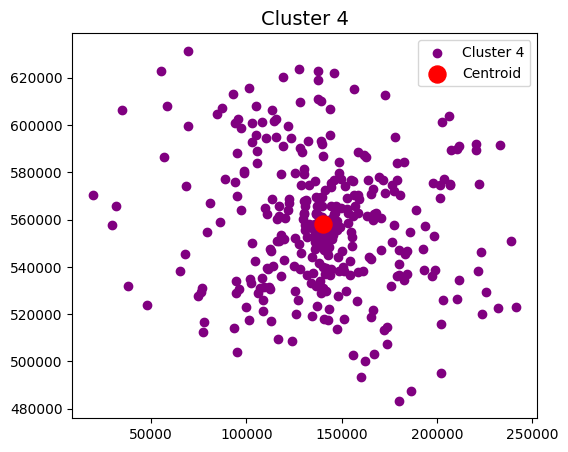

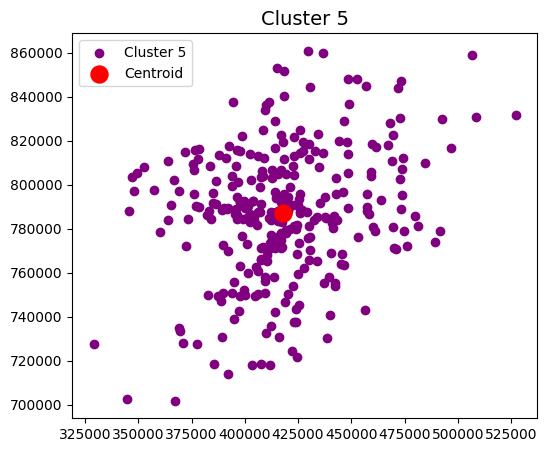

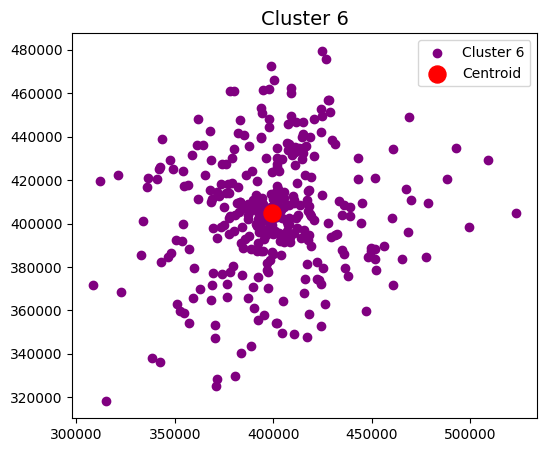

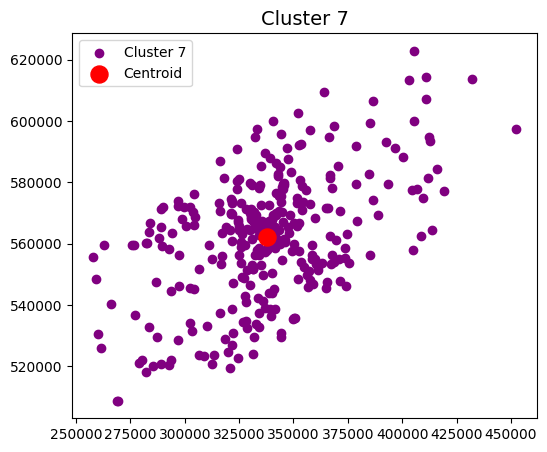

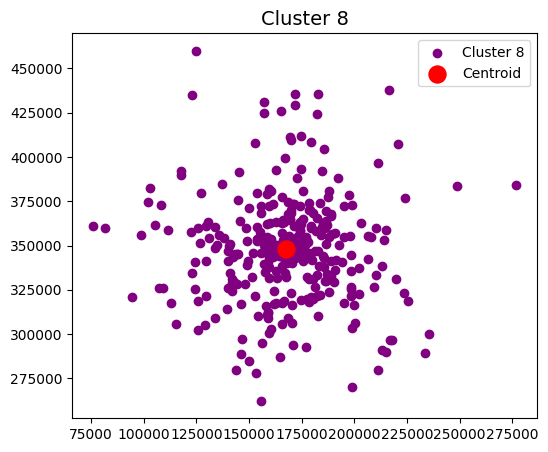

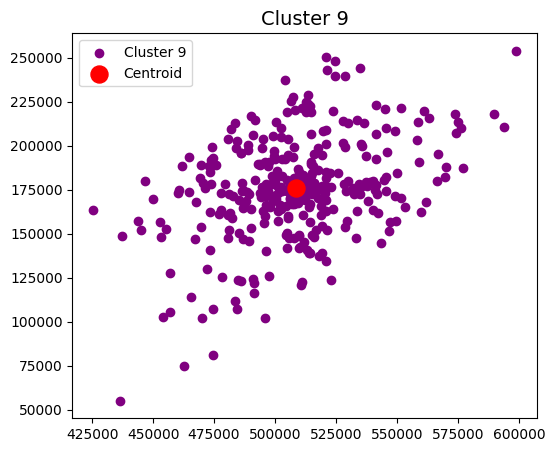

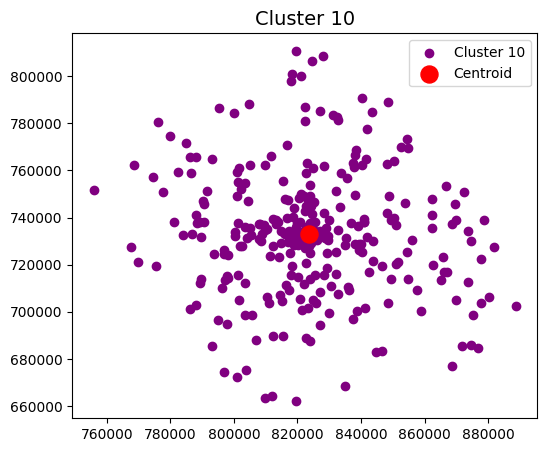

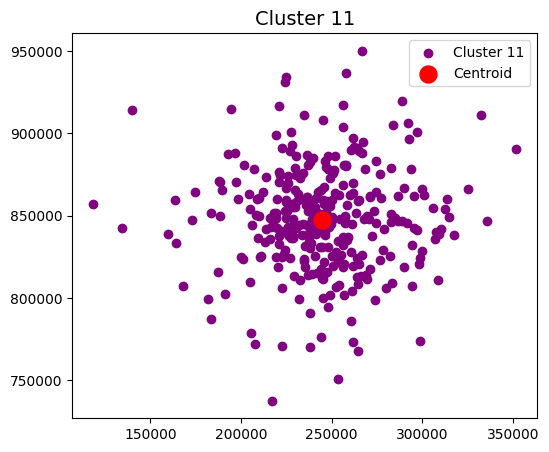

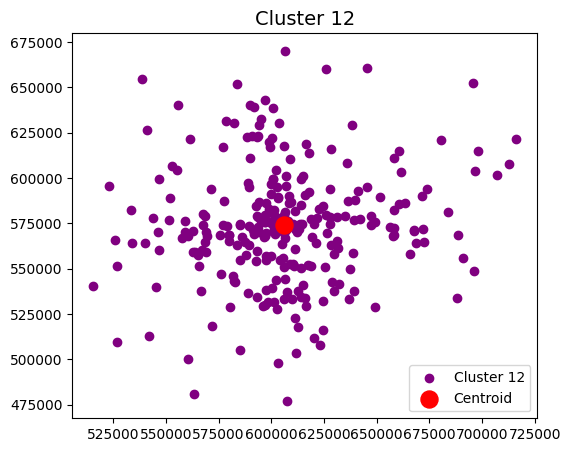

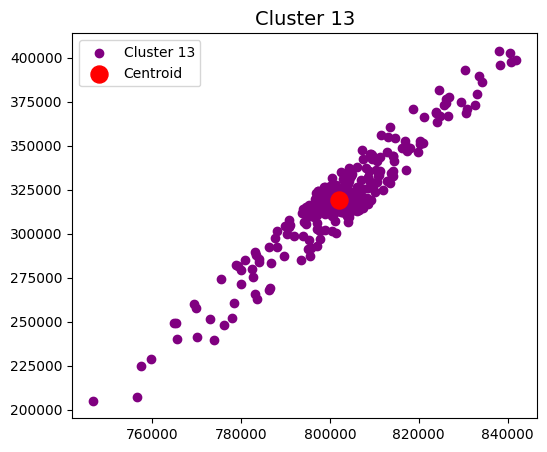

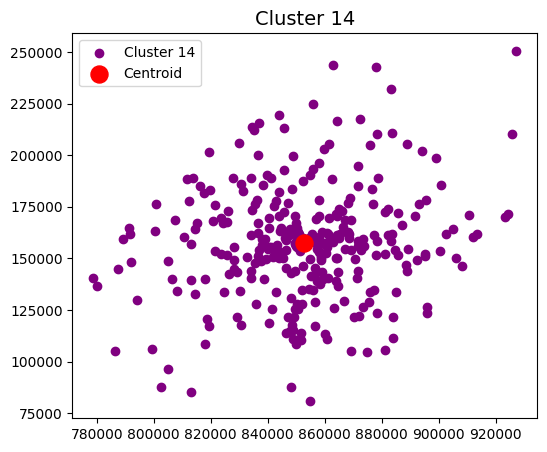

In [15]:
unique_labels = np.unique(y_predict)

for label in unique_labels:
    cluster_points = X[y_predict == label]
    
    centroid = centroids[label]
    
    plt.figure(figsize=(6, 5))
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c='purple', marker='o', label=f'Cluster {label}')
    
    plt.scatter(centroid[0], centroid[1], c='red', marker='o', s=150, label='Centroid')
    
    plt.title(f'Cluster {label}', fontsize=14)
    plt.legend()
    plt.show()


In [16]:
# Expected Output:

## K-Means

Please refer to this [document](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) for more information.

### Task 1

Play around with `data.txt` and:
* **TO DO1**: Apply the _K-Means Clustering_ algorithm and generate 15 clusters;
* **TO DO2**: Write down your observations for the `algorithm` parameter (_"lloyd"_ or _"elkan"_);
* **TO DO3**: Compute the centroids for each cluster;
* **TO DO4**: Visualise the obtained clusters with their corresponding centroids.

_Note:_ At the end of this task, please use the `markdown` option provided in the notebook for your observations.

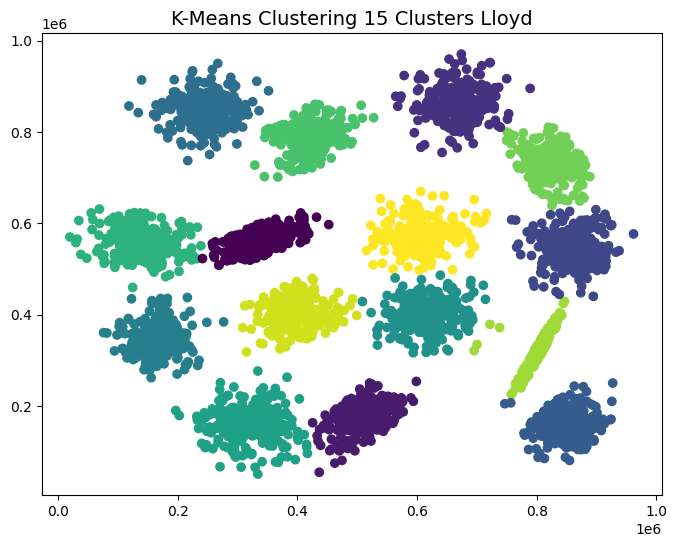

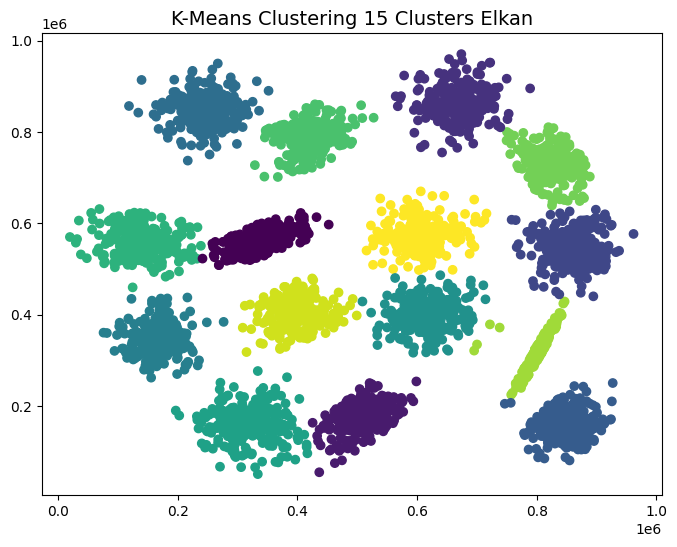

In [17]:
# TO DO1
from sklearn.cluster import KMeans

X = np.loadtxt('data.txt', usecols=(0, 1), skiprows=1)

kmeans_lloyd = KMeans(n_clusters=15, algorithm="lloyd", random_state=42)
kmeans_lloyd.fit(X)

labels = kmeans_lloyd.labels_


plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o', label='Data')
plt.title('K-Means Clustering 15 Clusters Lloyd', fontsize=14)
plt.show()

kmeans_elkan = KMeans(n_clusters=15, algorithm="elkan", random_state=42)
kmeans_elkan.fit(X)

labels_elkan = kmeans_elkan.labels_

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels_elkan, cmap='viridis', marker='o', label='Data')
plt.title('K-Means Clustering 15 Clusters Elkan', fontsize=14)
plt.show()


#### TO DO2

The difference between the Lloyd and Elkan algorithms can't be seen, at least on my machine.

From what I can find on the internet, Elkan is usually faster but takes up more storage so it's bad for big datasets.

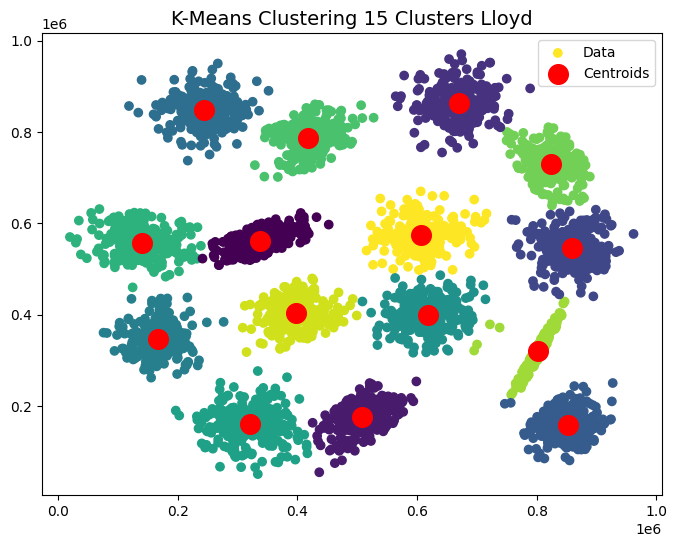

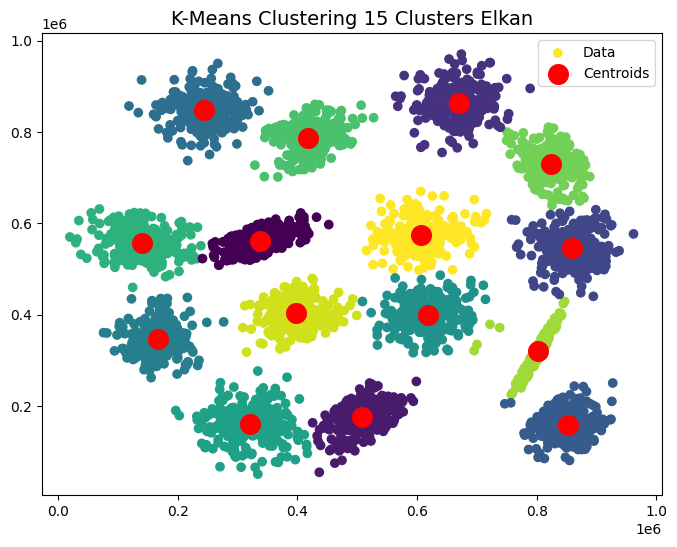

[[337565.11890244 562157.17682927]
 [507818.31339031 175610.41595441]
 [670929.06818182 862765.73295454]
 [858947.97134671 546259.65902579]
 [852058.45259939 157685.52293578]
 [244654.8856305  847642.04105572]
 [167856.14071856 347812.71556886]
 [617601.91071429 399504.21428571]
 [320602.55       161521.85      ]
 [139682.37572254 558123.40462428]
 [417799.69426752 787001.99363057]
 [823421.2507837  731145.27272727]
 [801616.78164557 321123.34177215]
 [398555.94857143 404855.06857143]
 [606380.41554054 574534.59121622]]

[[337565.11890244 562157.17682927]
 [507818.31339031 175610.41595441]
 [670929.06818182 862765.73295454]
 [858947.97134671 546259.65902579]
 [852058.45259939 157685.52293578]
 [244654.8856305  847642.04105572]
 [167856.14071856 347812.71556886]
 [617601.91071429 399504.21428571]
 [320602.55       161521.85      ]
 [139682.37572254 558123.40462428]
 [417799.69426752 787001.99363057]
 [823421.2507837  731145.27272727]
 [801616.78164557 321123.34177215]
 [398555.94857143 

In [18]:
# TO DO3

X = np.loadtxt('data.txt', usecols=(0, 1), skiprows=1)

kmeans_lloyd = KMeans(n_clusters=15, algorithm="lloyd", random_state=42)
kmeans_lloyd.fit(X)

labels_lloyd = kmeans_lloyd.labels_

centroids_lloyd = kmeans_lloyd.cluster_centers_

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels_lloyd, cmap='viridis', marker='o', label='Data')
plt.scatter(centroids_lloyd[:, 0], centroids_lloyd[:, 1], c='red', marker='o', s=200, label='Centroids')
plt.title('K-Means Clustering 15 Clusters Lloyd', fontsize=14)
plt.legend()
plt.show()

kmeans_elkan = KMeans(n_clusters=15, algorithm="elkan", random_state=42)
kmeans_elkan.fit(X)

labels_elkan = kmeans_elkan.labels_
centroids_elkan = kmeans_elkan.cluster_centers_

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels_elkan, cmap='viridis', marker='o', label='Data')
plt.scatter(centroids_elkan[:, 0], centroids_elkan[:, 1], c='red', marker='o', s=200, label='Centroids')
plt.title('K-Means Clustering 15 Clusters Elkan', fontsize=14)
plt.legend()
plt.show()

print(centroids_elkan)
print()
print(centroids_lloyd)

In [19]:
# Expected Output:
centroids

array([[858523.47107438, 549109.0137741 ],
       [321607.60349854, 161194.23323615],
       [672400.67597765, 861555.2849162 ],
       [619663.6884273 , 398658.75074184],
       [140019.83526012, 558305.60115607],
       [417799.69426752, 787001.99363057],
       [399223.625     , 404923.23579545],
       [337858.94189602, 562276.80428135],
       [167727.3880597 , 348147.6       ],
       [508441.62931034, 176054.77873563],
       [823717.6744186 , 733102.37209302],
       [244654.8856305 , 847642.04105572],
       [606060.5959596 , 574146.15824916],
       [802138.44551282, 319314.90384615],
       [852675.82769231, 157386.94461538]])

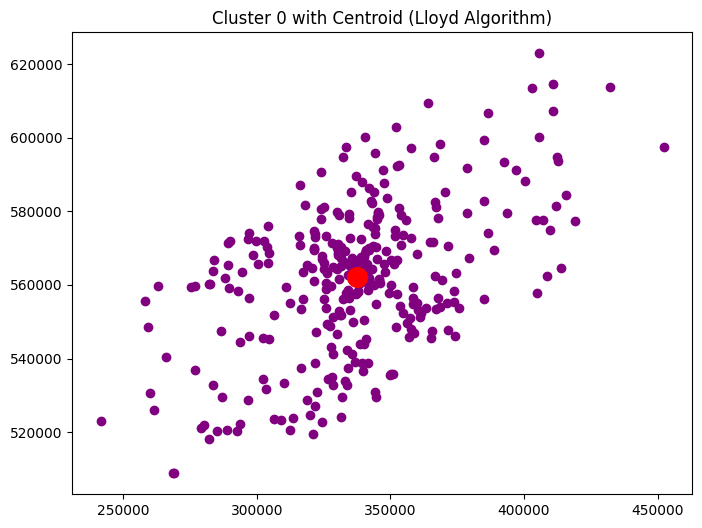

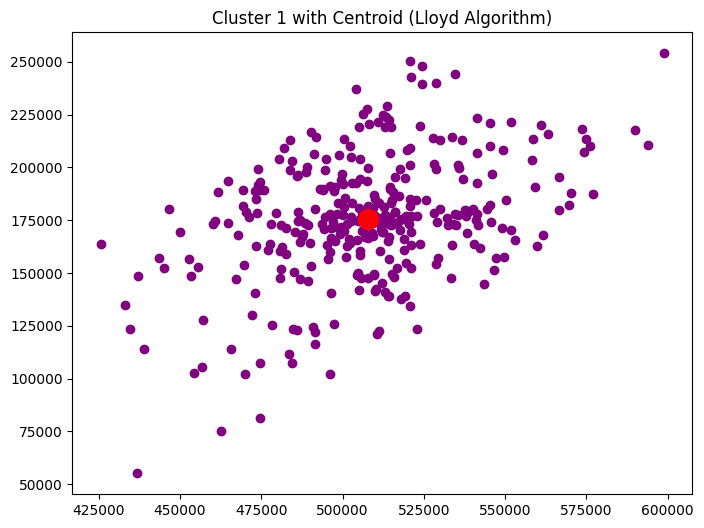

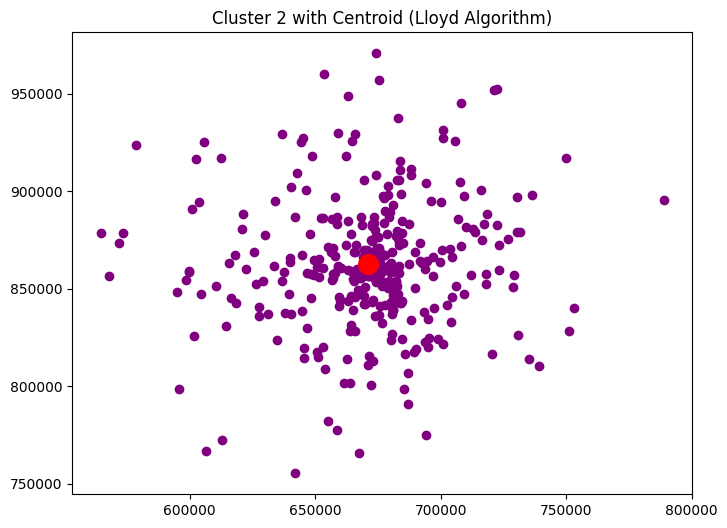

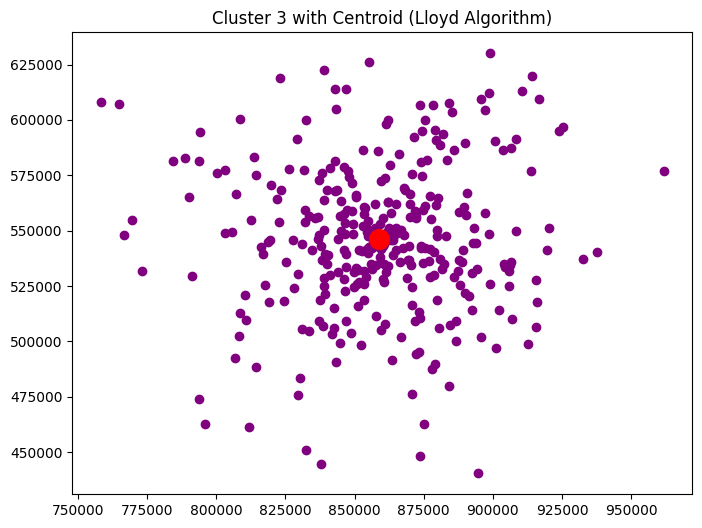

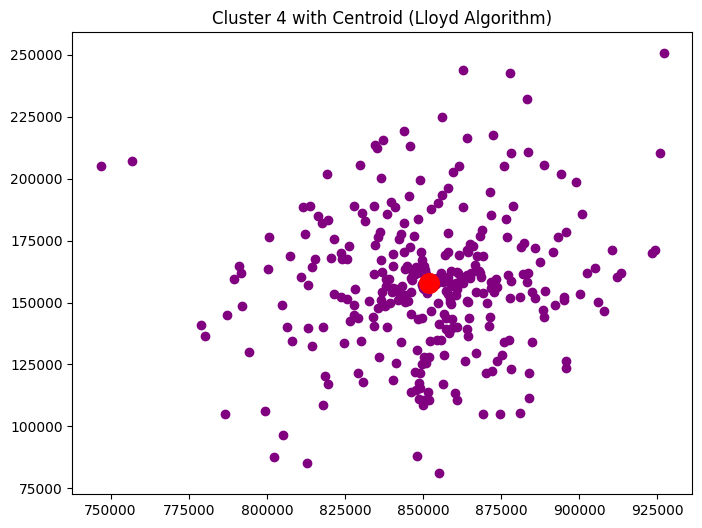

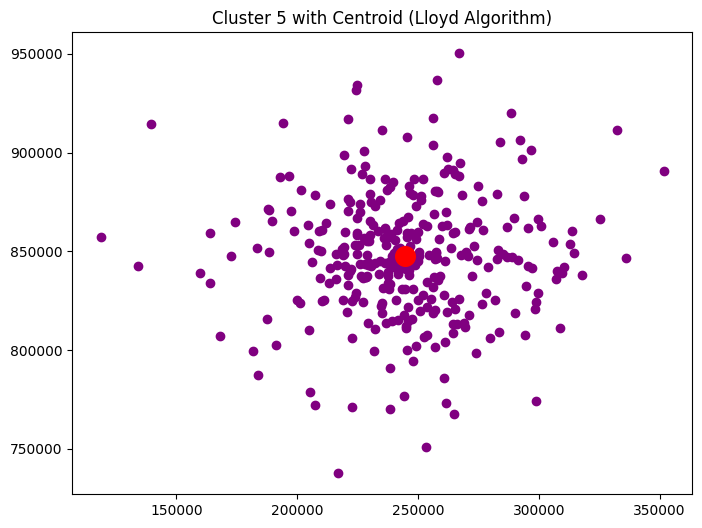

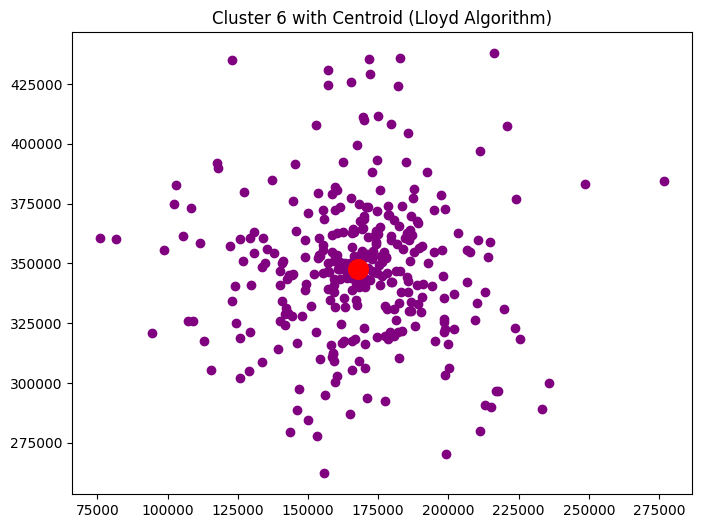

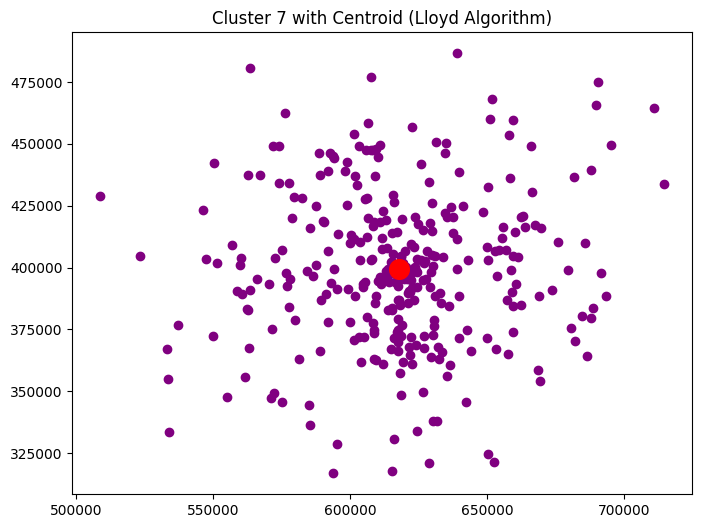

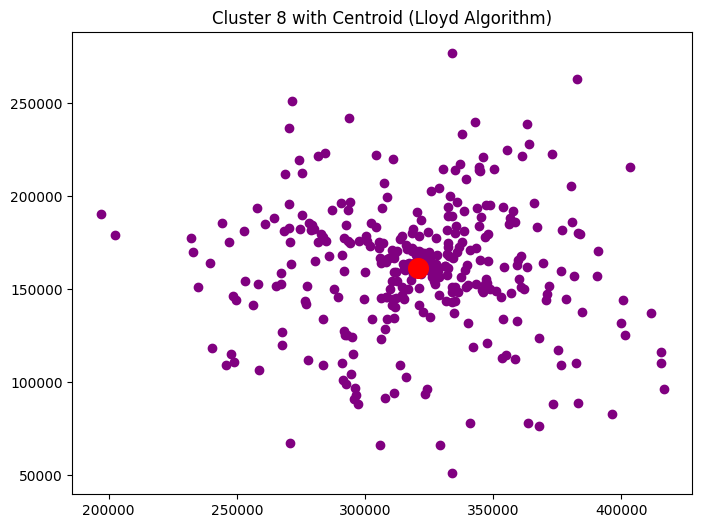

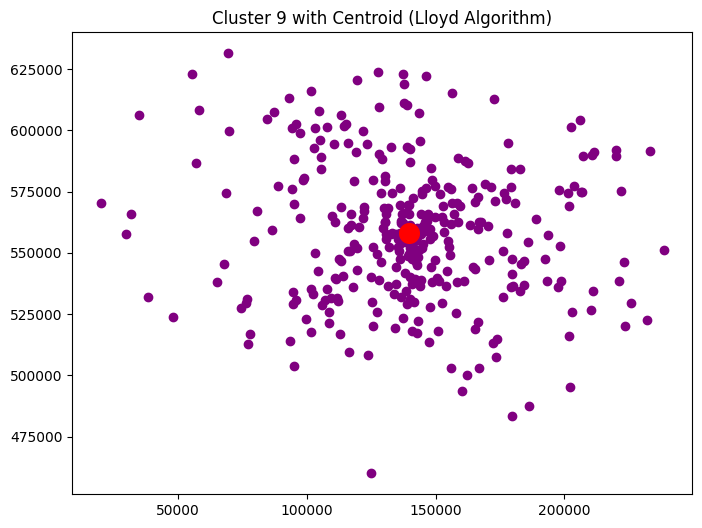

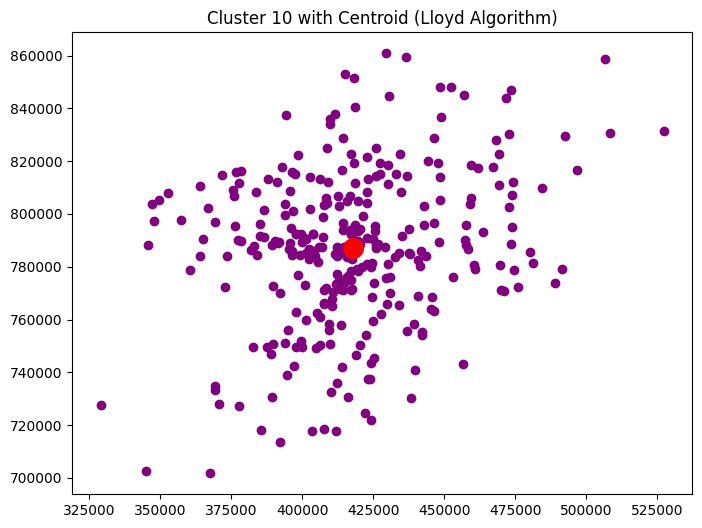

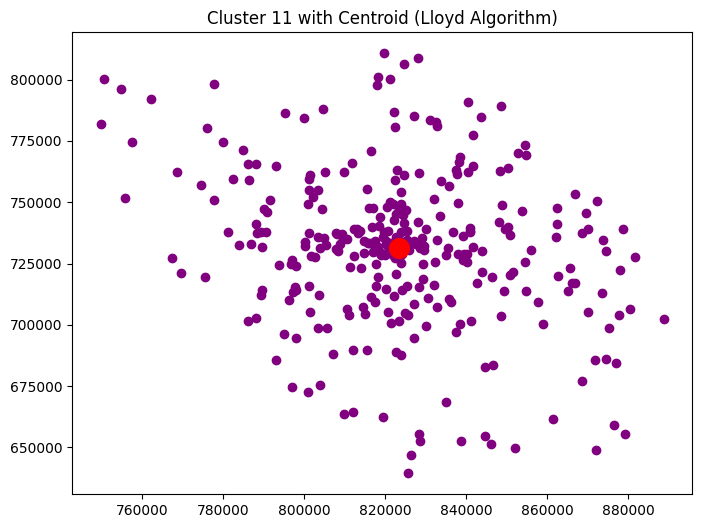

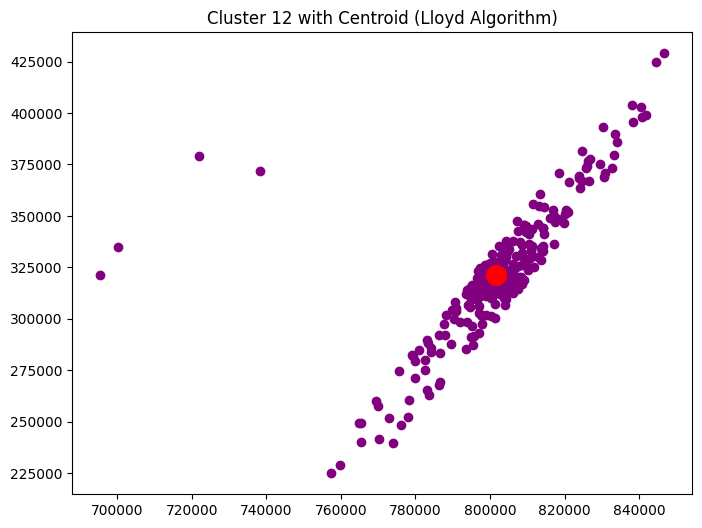

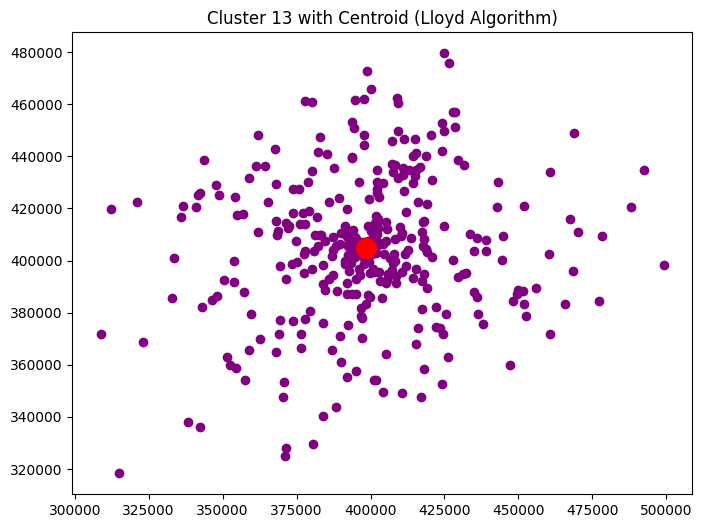

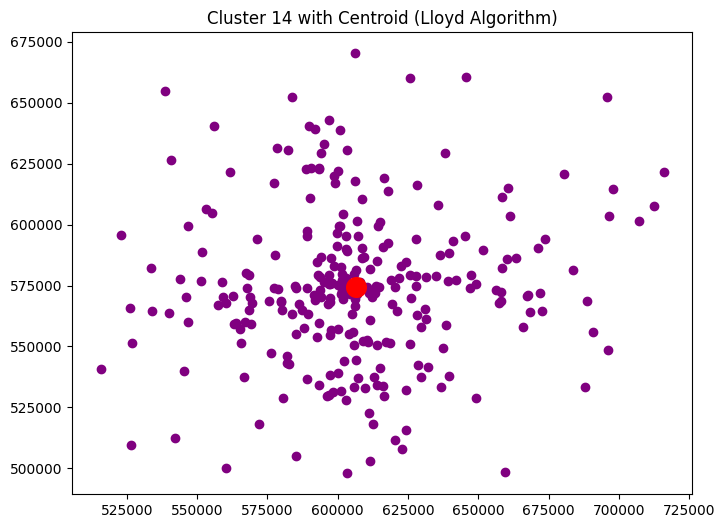

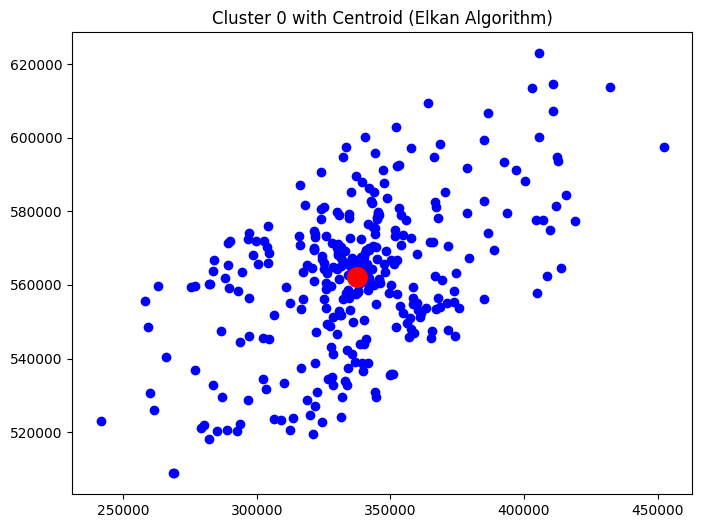

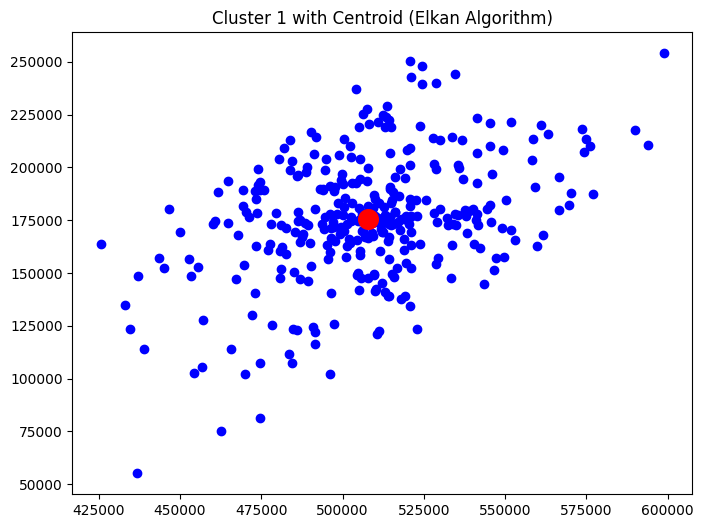

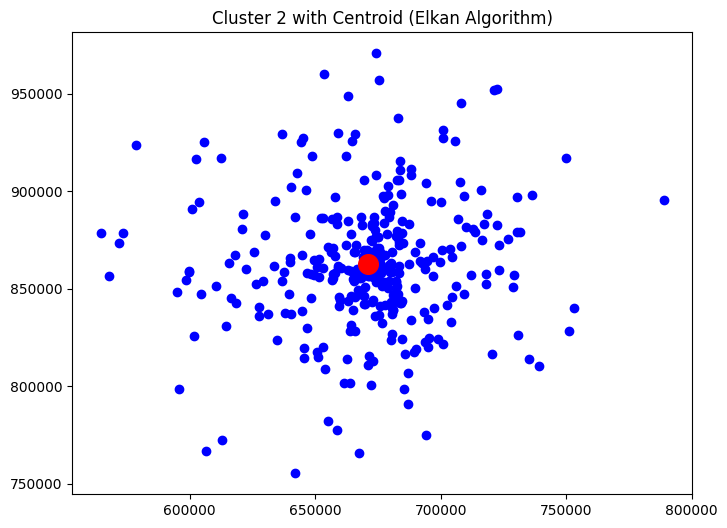

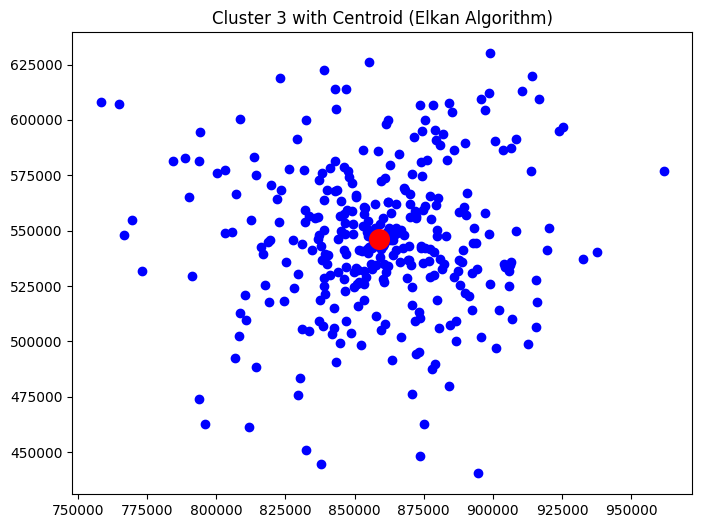

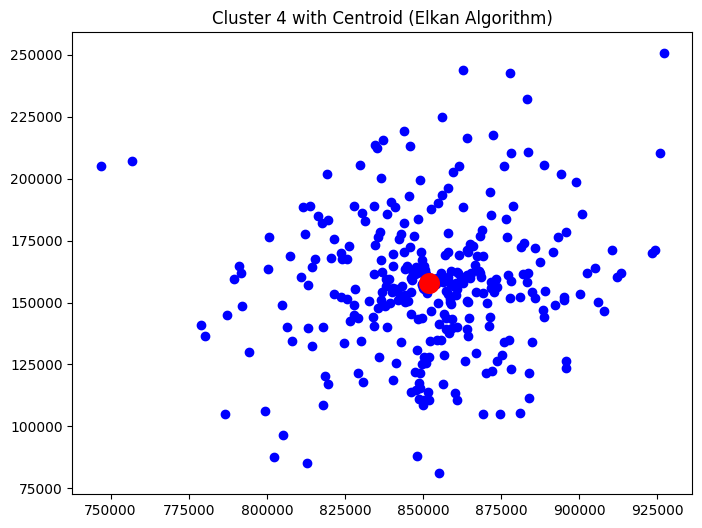

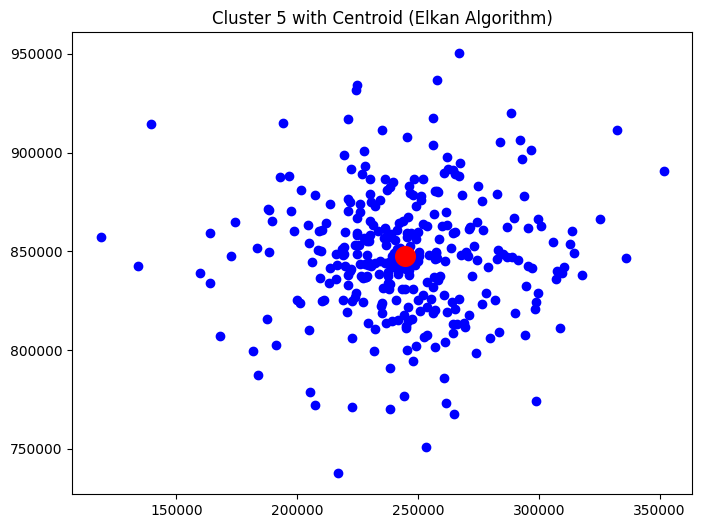

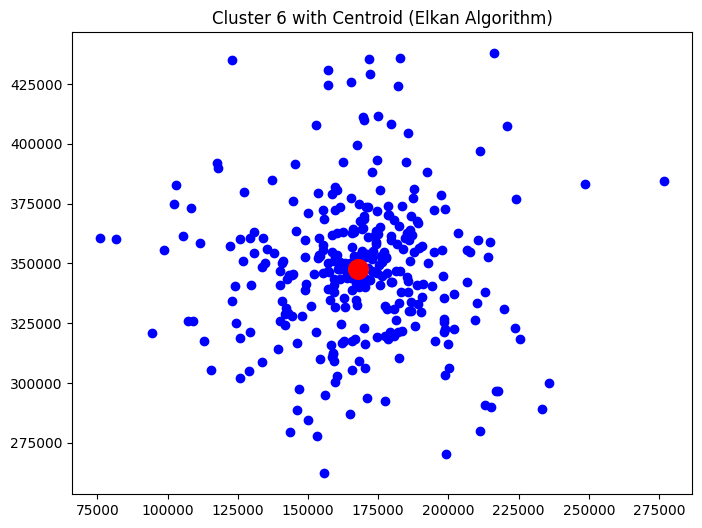

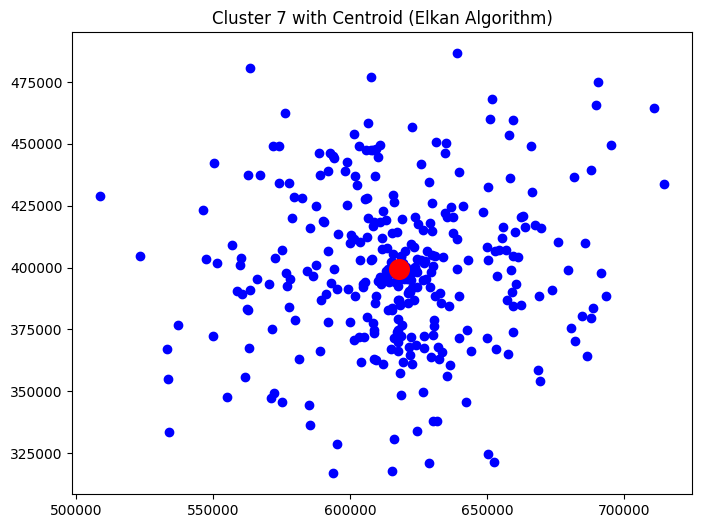

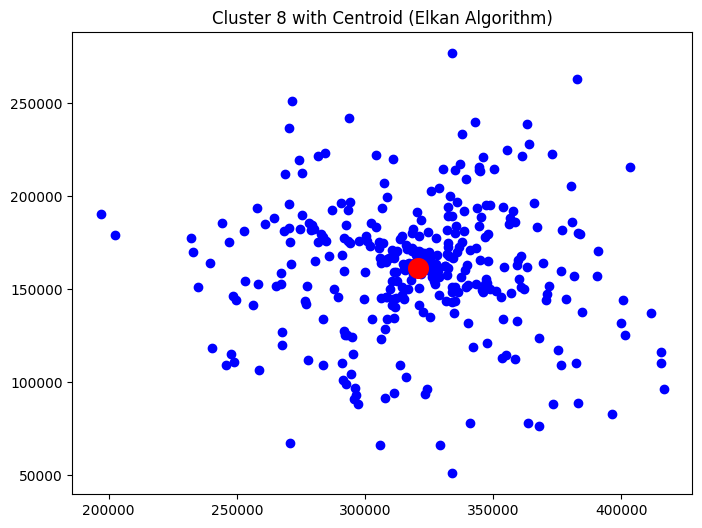

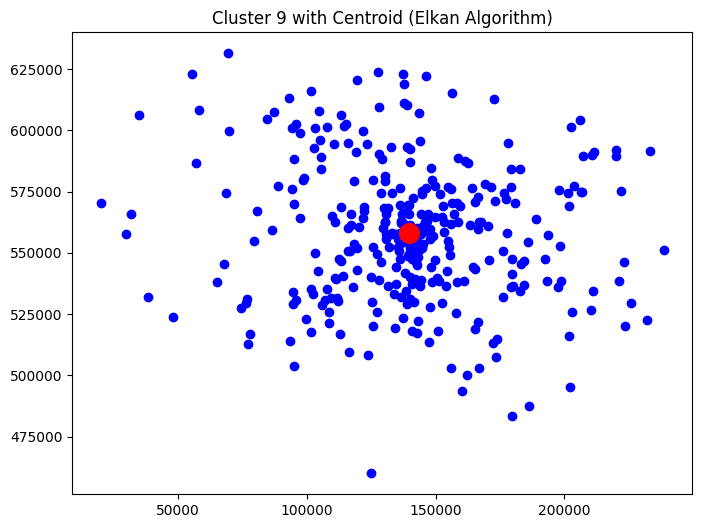

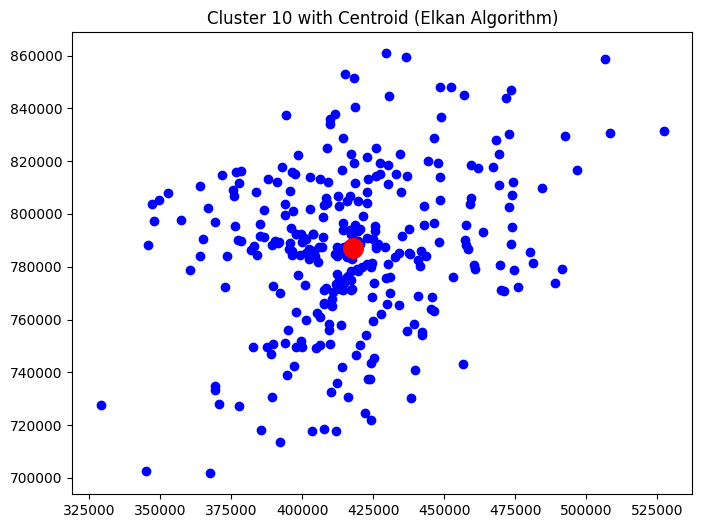

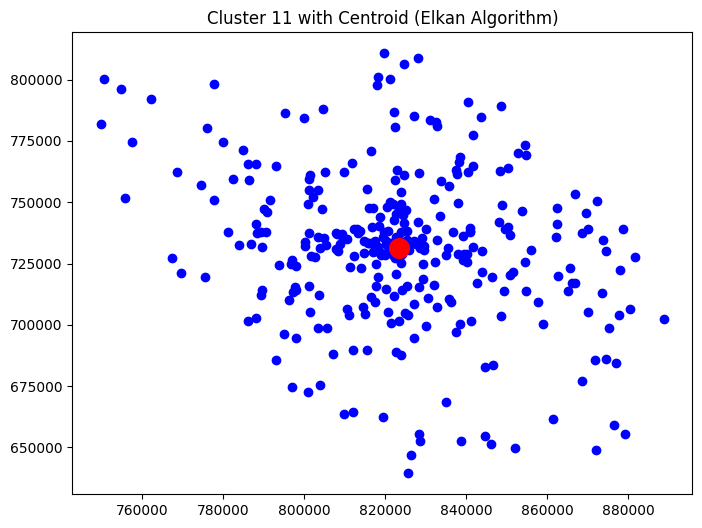

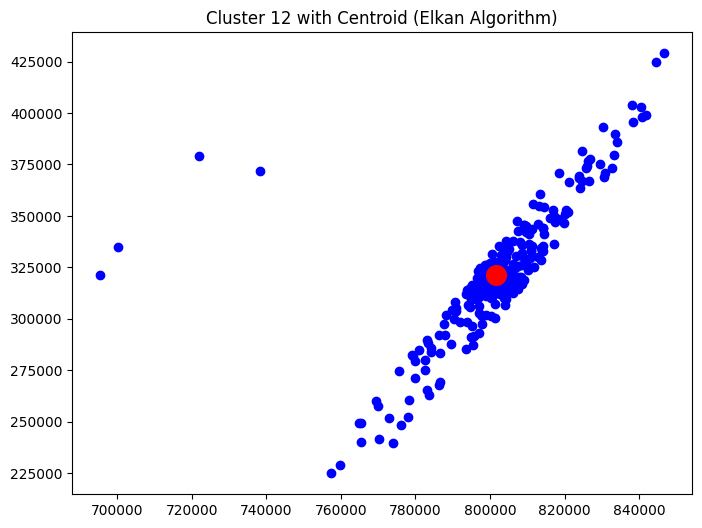

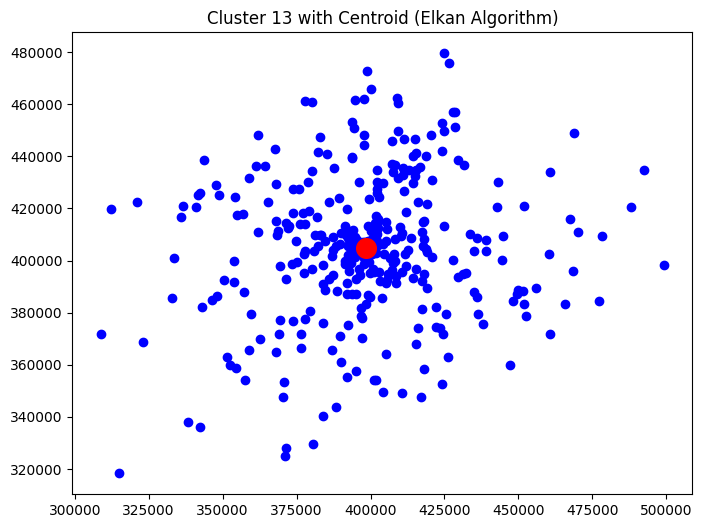

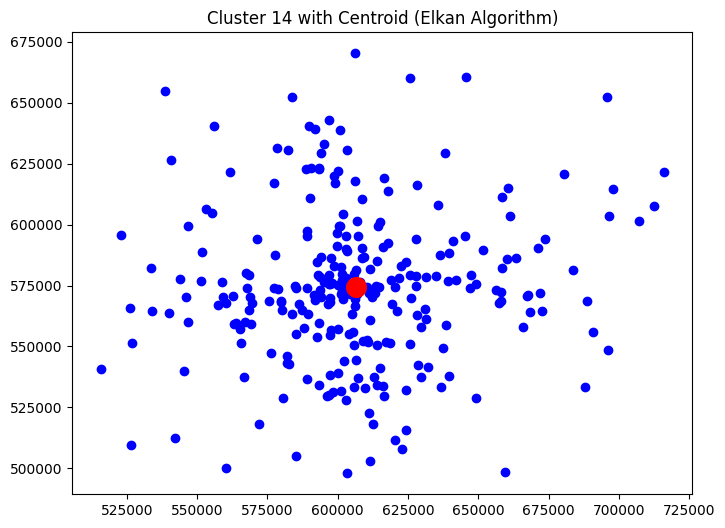

In [20]:
def plot_cluster_with_centroid(X, labels, centroids, cluster_label, algorithm_name):
    cluster_points = X[labels == cluster_label]
    
    centroid = centroids[cluster_label]
    
    plt.figure(figsize=(8, 6))
    if algorithm_name == 'Lloyd Algorithm':
        color = 'purple'
    else:
        color = 'blue'
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=color, marker='o', label=f'Cluster {cluster_label}')
    
    plt.scatter(centroid[0], centroid[1], c='red', marker='o', s=200, label='Centroid')
    
    plt.title(f'Cluster {cluster_label} with Centroid ({algorithm_name})')
    plt.show()

for cluster_label in np.unique(labels_lloyd):
    plot_cluster_with_centroid(X, labels_lloyd, centroids_lloyd, cluster_label, 'Lloyd Algorithm')

for cluster_label in np.unique(labels_elkan):
    plot_cluster_with_centroid(X, labels_elkan, centroids_elkan, cluster_label, 'Elkan Algorithm')


### Task 2

Try to modify the number of clusters for `data2.txt` and write down your observations for the _Agglomerative Hierarchical Clustering_ model.

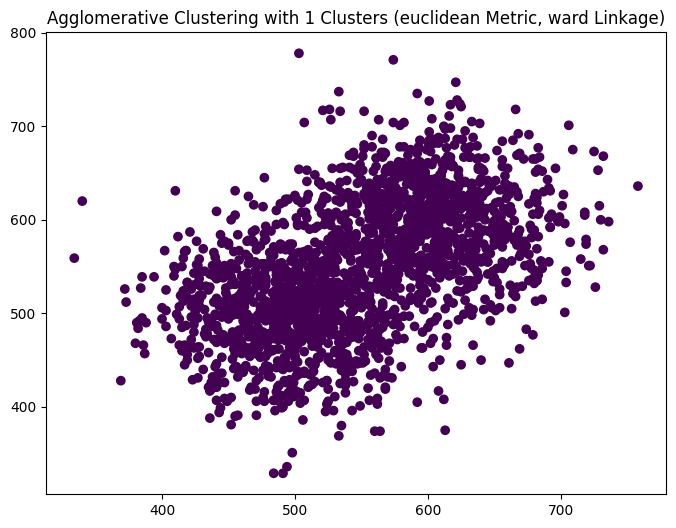

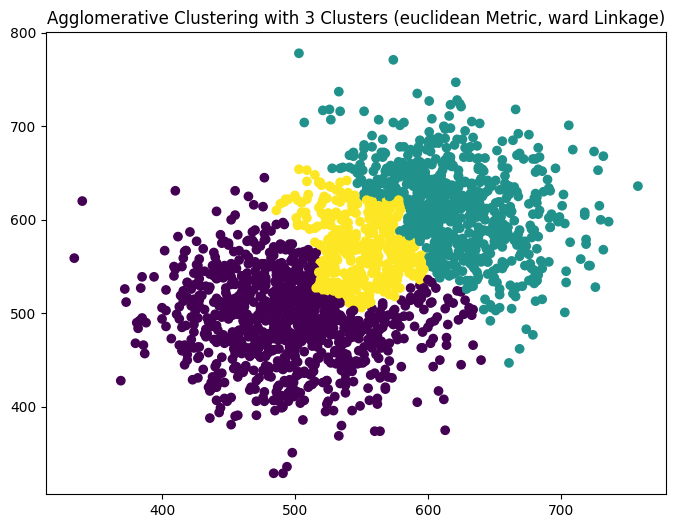

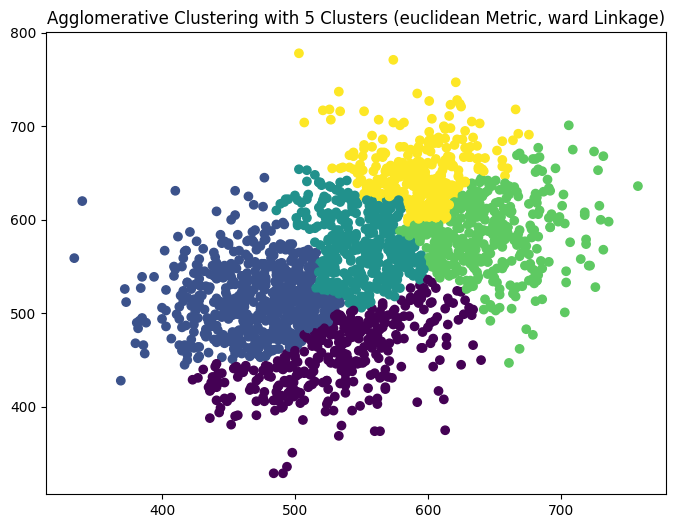

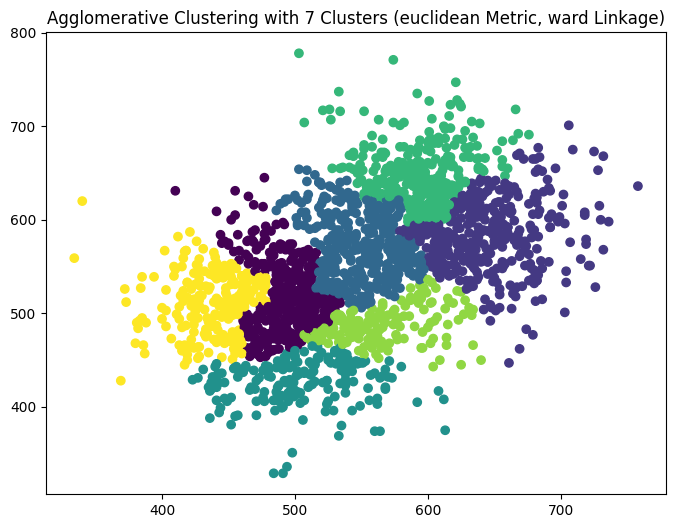

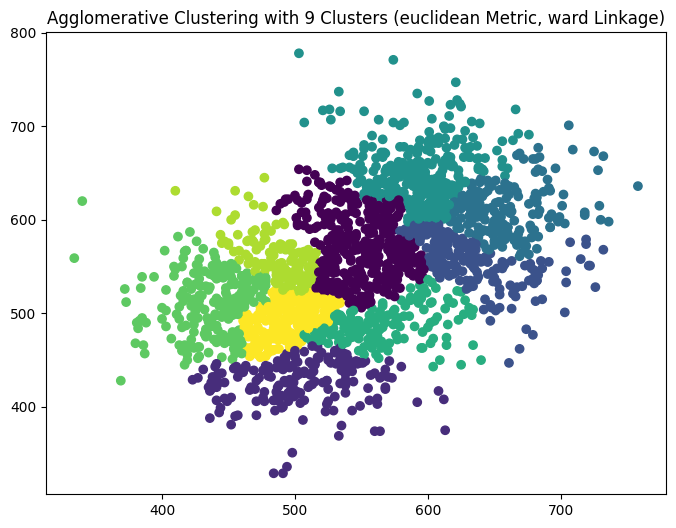

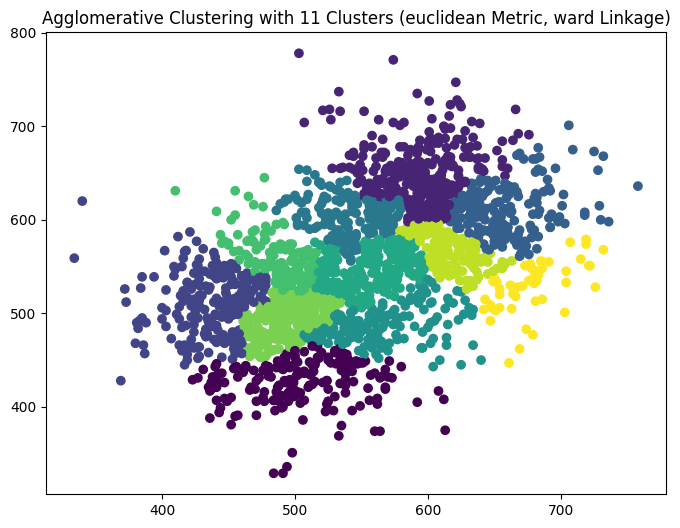

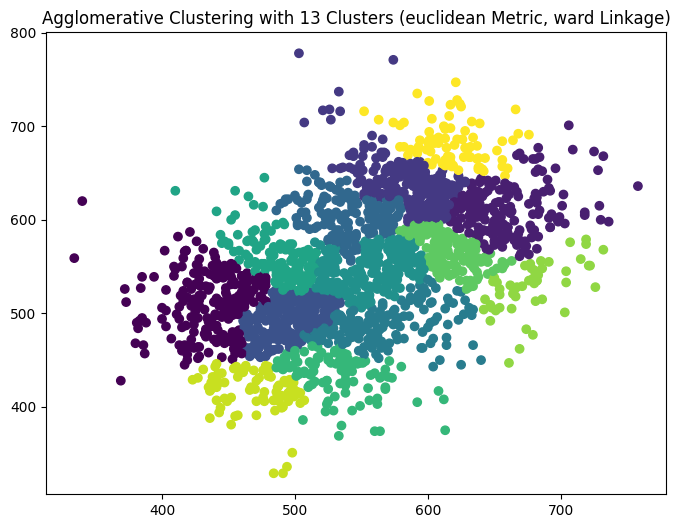

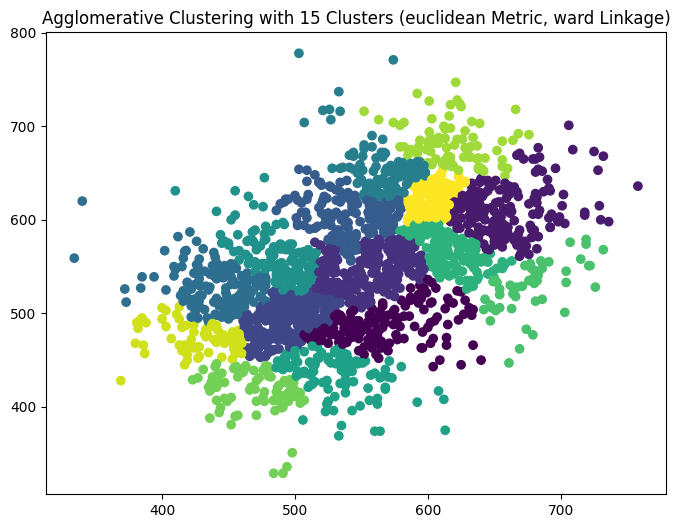

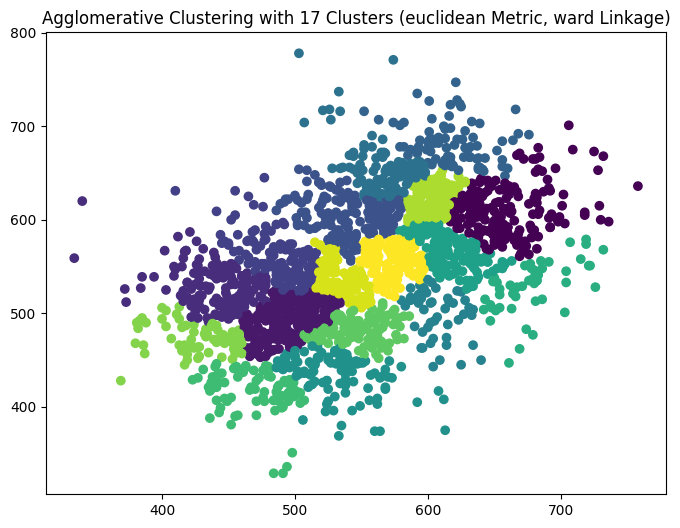

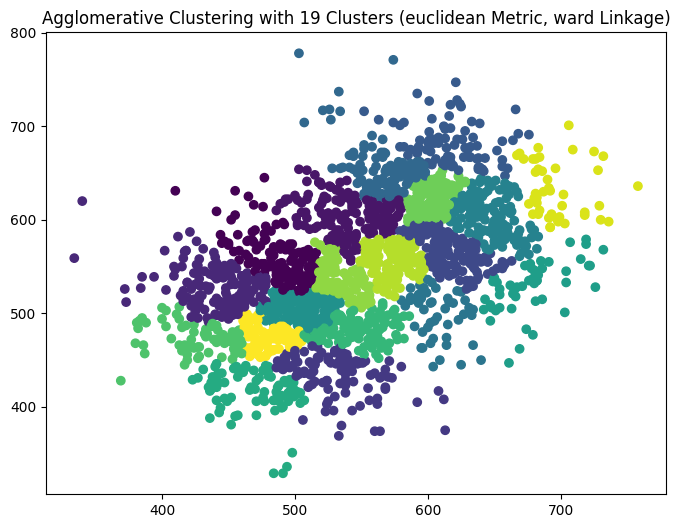

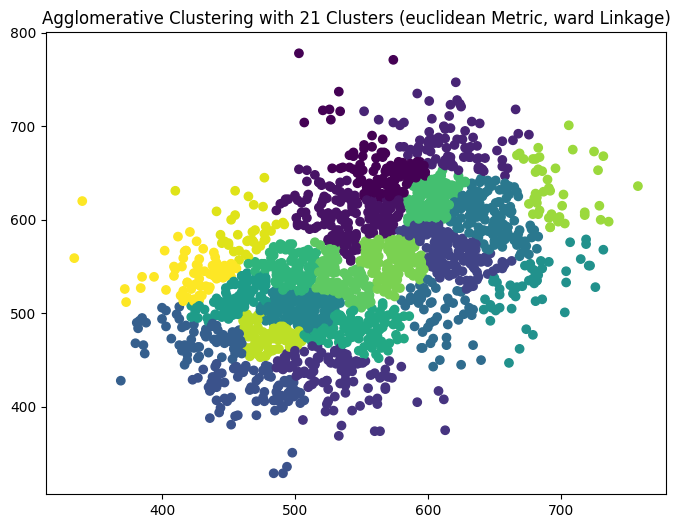

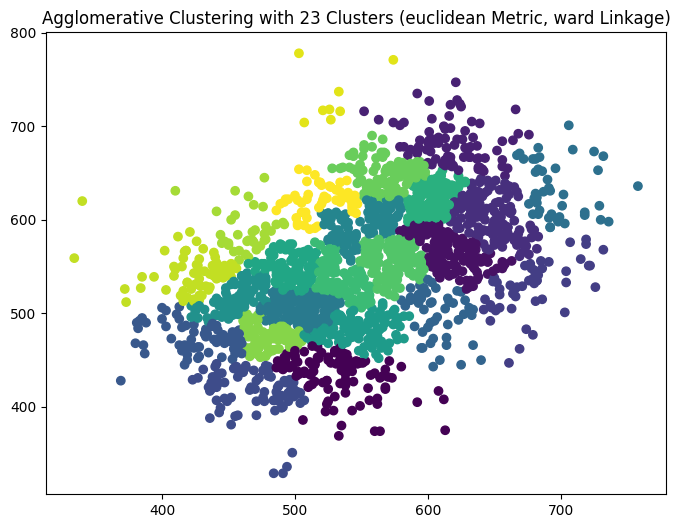

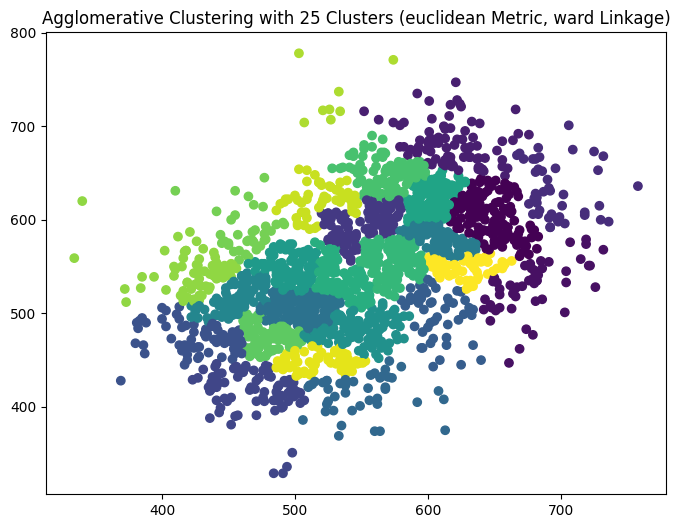

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

data2 = np.loadtxt('data2.txt', usecols=(0, 1), skiprows=1)

def plot_agglomerative_clusters(X, n_clusters, metric, linkage):
    model = AgglomerativeClustering(n_clusters=n_clusters, metric=metric, linkage=linkage)
    labels = model.fit_predict(X)
    
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o', label='Data Points')
    plt.title(f'Agglomerative Clustering with {n_clusters} Clusters ({metric} Metric, {linkage} Linkage)')
    plt.show()

n_clusters_list = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25]

metric = "euclidean" 
linkage = "ward"

for n_clusters in n_clusters_list:
    plot_agglomerative_clusters(data2, n_clusters, metric, linkage)


The more clusters we use, the more fragmented and grouped up everything is.

- Frimu Aurel-Viorel